# SIR Components Framework

<b> What is Farr's Law: </b>

Farr’s Law of Epidemics states that epidemics tend to rise and fall in a roughly symmetrical pattern or bell-shaped curve.

Using the SIR model, we assume the population consists of 3 different types of people:
- S : Susceptibles
- I : Infected
- R : Removed/Recovered

New infections occur as a result of contact between S and I individuals.

- Infection rate = Beta * S * I
- Recovery rate = Gamma * I

In [1]:
import numpy as np
from decimal import Decimal
import scipy.integrate as spi 

<b>Model</b>

In [44]:
class ModelSIR:
    S_initial = 0 # Susceptible
    I_initial = 0 # Infected
    R_initial = 0 # Recovered
    N_initial = 0 # S + I + R 
    Beta_initial = 0 
    Gamma_initial = 0 
    interval_inital = 0
    
    # initializing population
    def population_initial(self, S, I ,R):
        self.S_initial = S 
        self.R_initial = R 
        self.I_initial = I 
        self.N_initial = S + I + R
        
  # Setting the transmittion rate and the recovery rate
    def set_parameters(self, Beta, Gamma):
        self.Beta_initial = Beta
        self.Gamma_initial = Gamma
        
   # Setting the interval of the study period
    def set_intervals(self, start, finish, step):
        self.interval_initial = np.arange(start, finish, step) 
        
    # Set the population array
    def population_array(self):
        return (self.S_initial, self.I_initial, self.R_initial)
    
    # Returns the interval
    def get_interval(self):
        return self.interval_initial
    
    def get_equations(self, population, t):
        e_diff = np.zeros((3))
        e_diff[0] = -self.Beta_initial * population[0] * population[1]/self.N_initial # change of suseptable
        e_diff[1] = self.Beta_initial * population[0] * population[1]/self.N_initial - (self.Gamma_initial * population[1]) # change of infection 
        e_diff[2] = self.Gamma_initial * population[1] # Recovery 
        return e_diff

<b> Application </b>

In [3]:
model = ModelSIR()

In [33]:
model.population_initial(10000,200,50)
model.set_parameters(0.70,0.15)
model.set_intervals(1, 100, 0.02)

In [34]:
population_initial = model.population_array()
interval = model.get_interval()

In [35]:
# odient for integration
model_SIR = spi.odeint(model.get_equations, population_initial, interval)

In [36]:
S = (model_SIR[:,0])
I = (model_SIR[:,1])
R = (model_SIR[:,2])

In [37]:
x = np.arange(len(model_SIR),dtype=float)

In [38]:
for i in x:
    x[int(i)] = x[int(i)]*0.02

In [39]:
data_SIR = np.vstack([S,I,R,x])

<b> Graph </b>

In [40]:
from pylab import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [41]:
class Graphic:
    figure = figure(figsize(20,10))
    def generate_graph(self, data):
        x_axis = self.figure.add_subplot(111)
        plt.plot(data[3], data[0], 'g--', data[3], data[1], 'r-', data[3], data[2], '-.b', linewidth=3)
        plt.xlabel("Days")
        plt.ylabel("Population")
        plt.title("SIR Model")
        grid(False)
        legend(("Suseptables","Infected","Recovered"), shadow=True, fancybox=True)
        plt.show()

<Figure size 1440x720 with 0 Axes>

In [42]:
graphic = Graphic()

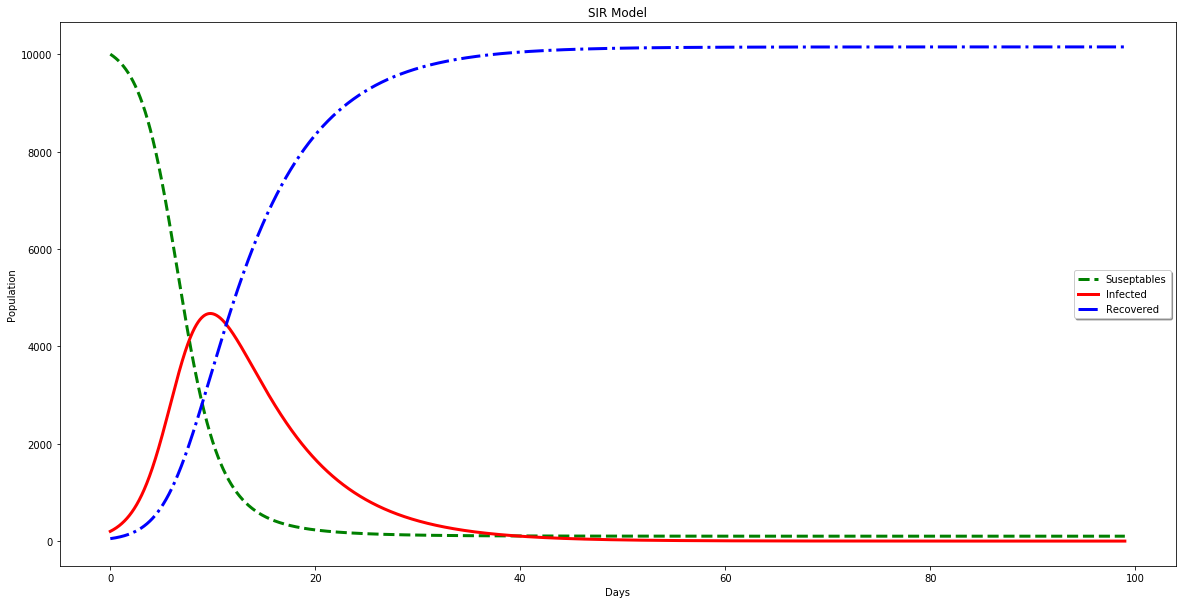

In [43]:
graphic.generate_graph(data_SIR)